In [2]:
### Neural Netork
### Train on July data with shuffle
### Predict on August data

In [2]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [3]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [4]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [5]:
#df = create_input_data.read_data(csv_file_name="../data/processed/past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_jul1_aug1.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,9904495,5315c0d39d9b80958306da0d58d4c80f23511dbf320c59...,13f12669b2c1d64b36b4333e0df18511fec7136beb13a9...,COMPLETED,2022-07-01 00:01:52,2022-07-01 00:01:53,2022-07-01 04:23:47,256,8,360,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1,9904499,8c8edaea40f116a07e9349440f28d10f95187ac2a5f369...,c3aa09d475334c5e5e3a12a5505f13da1f7ee6c4fce2b1...,COMPLETED,2022-07-01 00:02:17,2022-07-01 00:02:18,2022-07-02 16:56:53,208,16,2880,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
2,9904501,8c8edaea40f116a07e9349440f28d10f95187ac2a5f369...,c3aa09d475334c5e5e3a12a5505f13da1f7ee6c4fce2b1...,COMPLETED,2022-07-01 00:02:20,2022-07-01 00:02:24,2022-07-01 21:52:10,208,16,2880,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
3,9904502,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-01 00:03:14,2022-07-01 00:03:15,2022-07-01 00:36:28,48,1,120,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
4,9904503,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-01 00:03:15,2022-07-01 00:03:15,2022-07-01 00:31:31,48,1,120,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,...,0,0,0,0,0,0,0,0,0,0
67321,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,...,0,0,0,0,0,0,0,0,0,0
67322,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,...,0,0,0,0,0,0,0,0,0,0
67323,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,...,0,0,0,0,0,0,0,0,0,0


In [6]:
num_zeros, non_zeros = explore_util.get_num_of_zeros(df,'qm25')


Number of zeros in column: qm25: 55345
Number of elements in the column: 67325
Non-zero elements in the column: 11980


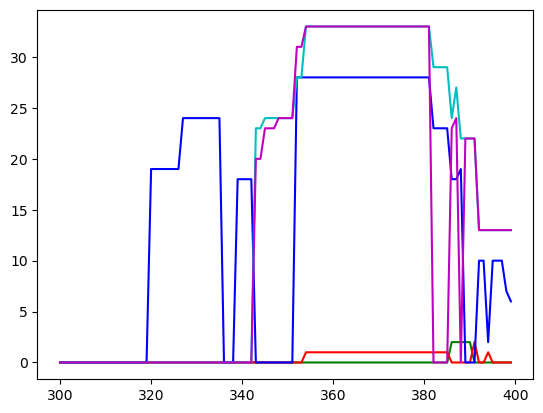

In [7]:
explore_util.explore_five_plots(df=df,col_name_list=['qm1','qm2','qm12','qm23','qm24'], num_col=5, color_list=['g','r','b','c','m'],lo=300, hi=400)

In [8]:
df = build_features.remove_default_cols(df)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,256,8,360,0,360,3,22436,9298603,261,-200,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1,208,16,2880,0,360,3,22436,9298603,2454,0,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
2,208,16,2880,0,360,3,22436,9298603,1309,0,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
3,48,1,120,0,360,3,22436,9298603,33,0,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
4,48,1,120,0,360,3,22436,9298603,28,0,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
67321,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
67322,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
67323,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = build_features.slice_df(df,1000,67325 )
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,68,1,2160,0,0,0,22449,9304658,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,68,1,2160,0,0,0,22449,9304658,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,68,1,2160,0,0,0,22449,9304658,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,68,1,2160,0,0,0,22449,9304658,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,68,1,2160,0,0,0,22449,9304658,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
67321,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
67322,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
67323,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
### Remove the queue_minutes column from the training set
X_historydata=build_features.remove_specific_col(df,'queue_minutes')
Y_waittimedata=df['queue_minutes']

In [11]:
X_historydata
#Y_waittimedata

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,68,1,2160,0,0,22449,9304658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,68,1,2160,0,0,22449,9304658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,68,1,2160,0,0,22449,9304658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,68,1,2160,0,0,22449,9304658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,68,1,2160,0,0,22449,9304658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,48,1,120,898116,394,22918,9692906,23,0,0,...,0,0,0,0,0,0,0,0,0,0
67321,48,1,120,898236,395,22918,9692906,54,0,0,...,0,0,0,0,0,0,0,0,0,0
67322,48,1,120,898356,396,22918,9692906,38,0,0,...,0,0,0,0,0,0,0,0,0,0
67323,100,2,180,898356,396,22918,9692906,129,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_historydata_train_rm, X_historydata_test_rm, Y_waittimedata_train, Y_waittimedata_test=build_features.split_training_test_data(X_historydata, Y_waittimedata)

shapes: X train: (49743, 43) Y train: (49743,)
shapes: X test: (16582, 43)Y test: (16582,)


In [13]:
X_historydata_test = build_features.remove_specific_col(X_historydata_test_rm,'run_minutes')
X_historydata_train = build_features.remove_specific_col(X_historydata_train_rm,'run_minutes')

In [14]:
X_historydata_train

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
53027,1,1,1200,3600,3,22903,9684466,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23753,48,1,120,5760,2,22647,9451689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50029,34,1,2880,0,0,22872,9655490,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29313,48,1,120,3120,3,22669,9460383,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2426,78,6,240,0,0,22464,9312338,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38194,48,1,120,0,0,22760,9561501,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7265,64,2,240,0,0,22505,9339432,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55886,1,1,60,576320,359,22917,9692896,1,3,6,...,1,1,1,1,1,1,1,0,0,0
1860,32,1,720,3600,5,22461,9310038,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_historydata_norm, scaler = build_features.standardization(X_historydata_train)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 2.880000e+03 1.380757e+06 6.790000e+02
 2.291800e+04 9.692906e+06 6.500000e+01 1.110000e+02 9.500000e+01
 1.300000e+02 1.300000e+02 1.540000e+02 1.390000e+02 2.010000e+02
 2.000000e+02 1.960000e+02 1.950000e+02 1.950000e+02 1.940000e+02
 2.240000e+02 1.900000e+02 1.860000e+02 2.290000e+02 2.040000e+02
 2.290000e+02 2.480000e+02 1.760000e+02 2.350000e+02 2.350000e+02
 2.050000e+02 2.350000e+02 2.520000e+02 2.520000e+02 2.520000e+02
 2.080000e+02 2.520000e+02 2.520000e+02 2.520000e+02 2.710000e+02
 2.780000e+02 2.780000e+02]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 2.244900e+04 9.304658e+06 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+

In [16]:
import joblib
joblib.dump(scaler, '35_lookback_jul22_scaler.gz')

['35_lookback_jul22_scaler.gz']

In [17]:
from importlib import reload
reload(train_model)
h5_file="../models/35lookback_jul22_qm_model.h5"
epochs=500
batch_size=64
validation_spilt=0.2
model = train_model.create_default_model(input_shape=42)
checkpoint_cb,early_stopping_cb = train_model.create_checkpoint_cb(h5_file=h5_file)
model, hist = train_model.train_model_cb_cp(X_historydata_norm, Y_waittimedata_train, model,checkpoint_cb,
                early_stopping_cb,h5_file, epochs, batch_size, validation_spilt)

Epoch 1/500
622/622 [==============================] - 1s 871us/step - loss: 446259.1250 - mae: 192.8348 - val_loss: 438306.0312 - val_mae: 212.2740
Epoch 2/500
622/622 [==============================] - 0s 742us/step - loss: 278107.8750 - mae: 170.3901 - val_loss: 153049.4844 - val_mae: 117.2630
Epoch 3/500
622/622 [==============================] - 0s 739us/step - loss: 113182.8047 - mae: 75.8086 - val_loss: 109342.5547 - val_mae: 68.2140
Epoch 4/500
622/622 [==============================] - 0s 735us/step - loss: 90795.0703 - mae: 60.1582 - val_loss: 98668.4844 - val_mae: 62.8003
Epoch 5/500
622/622 [==============================] - 0s 724us/step - loss: 79689.0391 - mae: 55.0309 - val_loss: 92435.5078 - val_mae: 58.2817
Epoch 6/500
622/622 [==============================] - 0s 719us/step - loss: 73811.8438 - mae: 53.0868 - val_loss: 87529.9062 - val_mae: 53.8909
Epoch 7/500
622/622 [==============================] - 0s 716us/step - loss: 68988.7891 - mae: 51.2563 - val_loss: 85028

In [18]:
predict_model.evaluate(model,scaler,X_historydata_test, Y_waittimedata_test)

519/519 [==============================] - 0s 477us/step - loss: 39724.7461 - mae: 47.1800
loss — -> 39724.74609375
mae — -> 47.180030822753906


In [19]:
from importlib import reload
reload(predict_model)
y_pred = predict_model.predict_and_compare(model,scaler, X_historydata_test, Y_waittimedata_test)

519/519 [==============================] - 0s 430us/step
y_pred shape : (16582, 1)
--- inspecting prediction values --- 
number of negative numbers  :11782
number of zeros in the data : 0
number of positive numbers  :4800

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 12917
number of positive numbers  :3665

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 11782
number of positive numbers  :4800



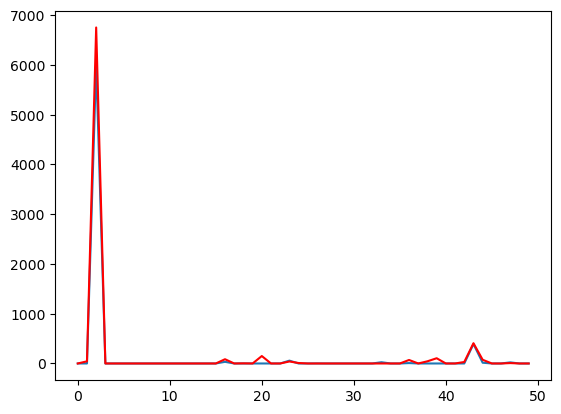

In [20]:
reload(predict_model)
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 150, 200)

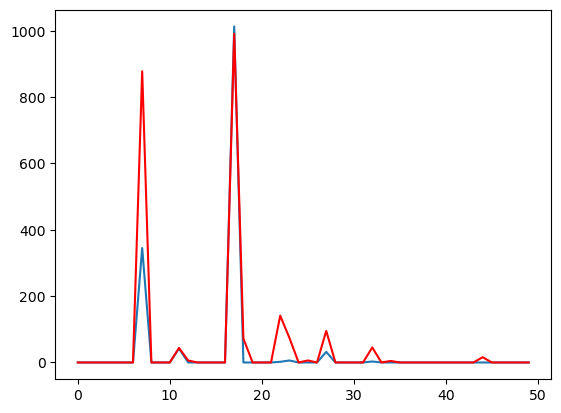

In [21]:
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 200,250)


In [22]:
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,207,210, "set 1: 207: 210")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,225,228, "set2: 225-228")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,228, 231, "set3: 228-231")

------------------set 1: 207: 210-----------------------
qm test:[345   0   0]
qm pred:[878.0543   0.       0.    ]
X test:       reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
60374       64       1          480           845647               630   
36910       48       1          120              780                 7   
49514       68       1         2160                0                 0   

       running_num_jobs  running_minutes  qm1  qm2  qm3  ...  qm26  qm27  \
60374             22918          9692906    0   16   17  ...    48    48   
36910             22742          9531253    0    0    0  ...     0     0   
49514             22855          9635371    0    0    0  ...     0     0   

       qm28  qm29  qm30  qm31  qm32  qm33  qm34  qm35  
60374    46    46    46    46    43    43    39    38  
36910     0     0     0     0     0     0     0     0  
49514     0     0     0     0     0     0     0     0  

[3 rows x 42 columns]
----------------------------

In [23]:
print(X_historydata_test_rm)
run_mins = X_historydata_test_rm["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))


       reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
15912       48       1          120              240                 2   
2309        48       1          120                0                 0   
34661       64       1          846              480                 4   
5678       272       4         2880                0                 0   
25788      136       2          120             6120                 5   
...        ...     ...          ...              ...               ...   
60600     1024      16           50           804366               531   
52256      100      50           45                0                 0   
45454       64       1          600              480                 4   
66018       48       1          120          1165686               517   
59839       64       1          120           635546               535   

       running_num_jobs  running_minutes  run_minutes  qm1  qm2  ...  qm26  \
15912             22590          

In [24]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig(2000,200, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    182
1     18
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    197
m      3
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 18-3=15

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    179
1     21
Name: count, dtype: int64


In [25]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    15354
1     1228
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    16311
m      271
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 1228-271=957

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    15116
1     1466
Name: count, dtype: int64


In [26]:
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=45, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 45: scheduled?
0    15859
1      723
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    16500
m       82
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 723-82=641

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    16118
1      464
Name: count, dtype: int64


In [27]:
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=60, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 60: scheduled?
0    15934
1      648
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    16501
m       81
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 648-81=567

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    16290
1      292
Name: count, dtype: int64


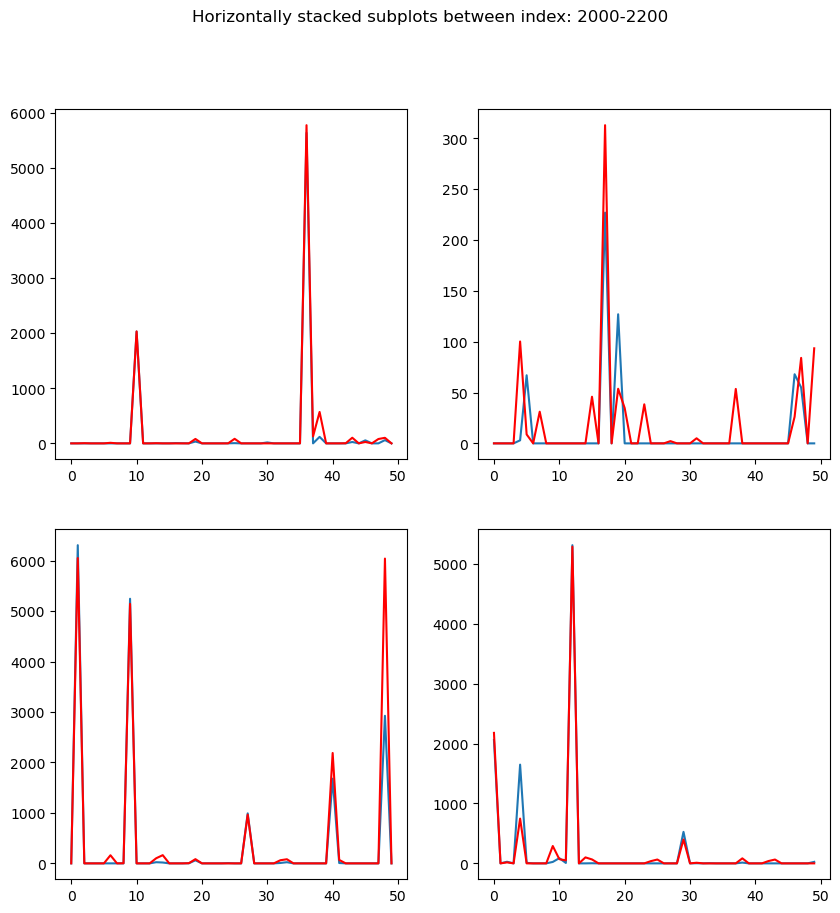

In [28]:
reload(analyze_pred)
analyze_pred.plot_pred_vs_orig(2000,50,Y_waittimedata_test,y_pred.ravel())

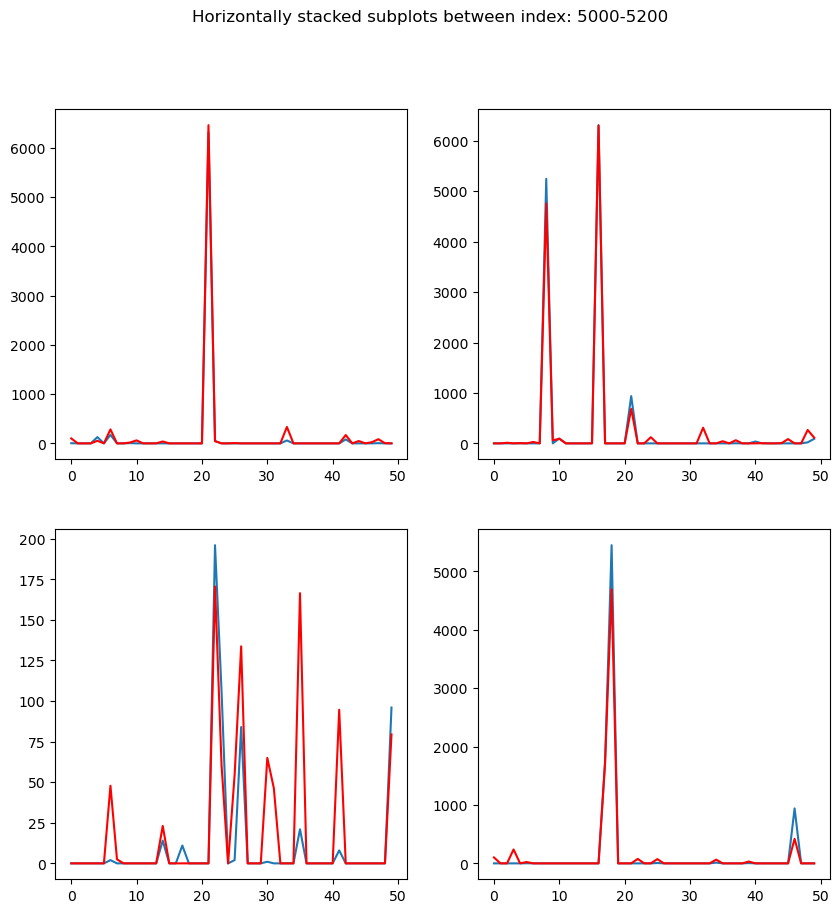

In [29]:
analyze_pred.plot_pred_vs_orig(5000,50,Y_waittimedata_test,y_pred.ravel())

In [58]:
from sklearn.metrics import r2_score
r2_score(Y_waittimedata_test.to_numpy(),y_pred)

0.9246633479213913

In [62]:
df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_35_completed_qm.csv", parse_dates_col=[4,5,6])

In [63]:
df25 = build_features.remove_default_cols(df25)
df25

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,48,1,120,1,898116,393,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
1,48,1,120,1,898236,394,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
2,48,1,120,1,898356,395,22918,9692906,44,0,...,0,0,0,0,0,0,0,0,0,0
3,48,1,120,1,898476,396,22918,9692906,41,0,...,0,0,0,0,0,0,0,0,0,0
4,48,1,120,1,898596,397,22918,9692906,37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,2,20560,12,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,2,20580,13,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,2,20600,14,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,2,20620,15,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df25 = build_features.slice_df(df25,100,69801)
X_historydata25=build_features.remove_specific_col(df25,'queue_minutes')
Y_waittimedata25=df25['queue_minutes']
X_historydata_test25 = build_features.remove_specific_col(X_historydata25,'run_minutes')
X_historydata_test25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
100,48,1,120,850657,369,22918,9692906,1,1,1,...,3,8,8,5,6,10,10,10,15,15
101,48,1,120,850777,370,22918,9692906,1,1,1,...,3,8,8,5,6,10,10,10,15,15
102,64,1,300,849937,363,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
103,64,1,300,850237,364,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
104,64,1,300,850537,365,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_historydata_test25.iloc[0:120,:]

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
100,48,1,120,850657,369,22918,9692906,1,1,1,...,3,8,8,5,6,10,10,10,15,15
101,48,1,120,850777,370,22918,9692906,1,1,1,...,3,8,8,5,6,10,10,10,15,15
102,64,1,300,849937,363,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
103,64,1,300,850237,364,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
104,64,1,300,850537,365,22918,9692906,0,0,0,...,0,1,0,5,4,5,5,4,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,48,1,120,860137,410,22918,9692906,1,1,0,...,0,0,0,0,0,0,1,1,1,1
216,48,1,120,860257,411,22918,9692906,1,1,0,...,0,0,0,0,0,0,1,1,1,1
217,64,1,20,859897,408,22918,9692906,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,64,1,20,859897,408,22918,9692906,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#import from sklearn.model_selection import train_test_split
#X_historydata_train_rm_jul, X_historydata_test_rm_jul, Y_waittimedata_train_jul, Y_waittimedata_test_jul=build_features.split_training_test_data(X_historydata_test25, Y_waittimedata25)

In [69]:
y_pred25_aug = predict_model.predict_and_compare(model,scaler, X_historydata_test25.iloc[0:120,:], Y_waittimedata25[0:120])

4/4 [==============================] - 0s 854us/step
y_pred shape : (120, 1)
--- inspecting prediction values --- 
number of negative numbers  :0
number of zeros in the data : 0
number of positive numbers  :120

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 41
number of positive numbers  :79

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 0
number of positive numbers  :120



In [75]:
y_pred25_aug.shape

(120, 1)

In [70]:
#print(X_historydata_test_rm)
run_mins = X_historydata25["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata25["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))

run_minutes[58 37 68 ...  3  3  2]
 nnodes : [ 1  1  1 ... 16 16  1]


In [ ]:
# run_mins = X_historydata25["run_minutes"]
# run_mins = run_mins.to_numpy()
# print("run_minutes" + str(run_mins))
# nnodes = X_historydata_test25["nnodes"]
# nnodes = nnodes.to_numpy()
# print(" nnodes : " + str(nnodes))

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error
def analysis_pred1(provision_time):
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    r2_scores=[]
    maes = []
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata25[0:120], y_pred25_aug.ravel(), nnodes[0:120],run_mins[0:120],    
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(35)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata25[0:120].to_numpy(),y_pred25_aug)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata25[0:120].to_numpy(),y_pred25_aug))
    return past_K,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes         

In [97]:
import pandas as pd
reload(analyze_pred)
lo=0
#offset=51600
offset=120
provision_times=[20, 45, 60, 90]
tolerance_factor=3

rdf = pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    #print(" ========= Provision time = " + str(provision_time))
    pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num, r2_scores, maes = analysis_pred1(provision_time)
    for i in range(0, len(pastk)):
        #print("num_scheduled: " + str(num_scheduled[i]))
        rdf =  analyze_pred.append_to_df(rdf,pastk[i],ptime[i], num_scheduled[i], num_missed[i], not_missed[i], wrongly_scheduled[i], total_num[i],r2_scores[i],maes[i])
     

<class 'int'> 120
<class 'int'> : 120
False
<class 'int'> 114
<class 'int'> : 120
True
<class 'int'> 79
<class 'int'> : 120
True
<class 'int'> 104
<class 'int'> : 120
True


In [98]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,35,20,49,0,49,49,120,-0.682446,98.557676
1,35,45,42,6,36,42,120,-0.682446,98.557676
2,35,60,42,41,1,42,120,-0.682446,98.557676
3,35,90,17,16,1,17,120,-0.682446,98.557676
